In [59]:
import timeit
start = timeit.default_timer()

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
from sklearn.model_selection import cross_val_score
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from numpy import mean
from numpy import absolute
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Explore the data


In [60]:
df = pd.read_csv("/content/train.csv")
test_df = data_test = pd.read_csv("/content/test.csv")

label = df['count']
train_df = df.copy()


In [ ]:
train_df.shape

(8164, 13)

In [ ]:
#dropping the duplicates
train_df = train_df.drop_duplicates()

In [ ]:
train_df.shape
# We can see there are no duplicates in our data.

(8164, 13)

 ## Little Glimpse at our data: <br>

***How does our data behave?***<br>Even before performing any action, we would like to examine the data and examine closely each feature in order to plan the next steps and draw important conclusions.<br> 
To do so, we chose to focus on several topics which we would like to handle later: outliers, missing values, normalization,<br> dimensionality, dealing with categorical variables, and examining options for developing new features and mathematical manipulation of the existing features.<br>
<br><br>
We chose to start by seeing what the data looks like in a preview

In [ ]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,35
1,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,251
2,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,53
3,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,296
4,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,16


In [ ]:
# using describe to see more information on the data
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
count,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,2.510289,0.029397,0.683244,1.415483,20.244980,23.670160,61.835130,12.791334,47.152120,20.245980,0.004986,191.339784
std,1.117178,0.168928,0.465240,0.631242,7.796018,8.468725,19.255791,8.213914,72.882602,7.796018,0.006319,181.143178
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000304,0.821000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,3.693188,13.941000,0.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.684113,20.501000,0.000242,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,59.257746,26.241000,0.004489,285.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,754.304876,41.001000,0.015615,970.000000


In [ ]:
# checking if there some nulls
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
pollution     0
sunlight      0
traffic       0
count         0
dtype: int64

as we can see we have no missing data 

Let's see the types of our features-

In [ ]:
train_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
pollution     float64
sunlight      float64
traffic       float64
count           int64
dtype: object

We noticed that all the features execpet "datetime" are numeric ones, we need to think how to handle with this feature.
In addition, we have some catgorical features and we need to think how to engineering them fit to our model.

In [61]:
# explore the "datetime feature"
# We discoverd that pandas can handle with datetime object and we will use it to explore this feature and try to getting wise conclusions from it.
train_df['datetime'] = pd.to_datetime(train_df['datetime'],  format = '%Y-%m-%dT%H:%M:%S' ,  errors = 'coerce')
# we will create a new temporary df to explore this feature and after we will decide what to do him based on our conclousins
# we decide to check the year,month and the hour because their are the main relevent parts  in datetime
new_df = pd.DataFrame({'year':train_df['datetime'].dt.year,'month':train_df['datetime'].dt.month,'hour':train_df['datetime'].dt.hour,'label':train_df['count']})

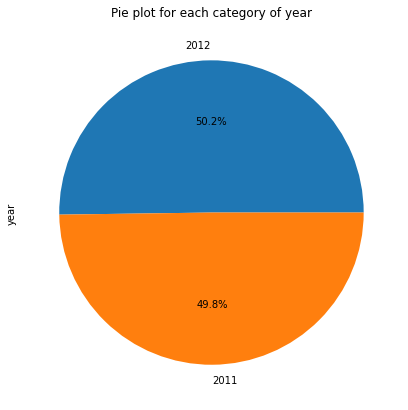

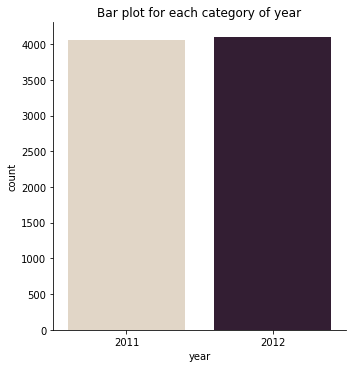

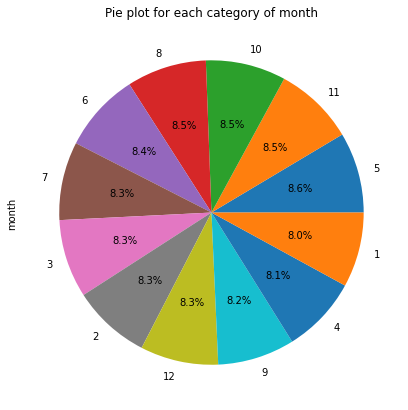

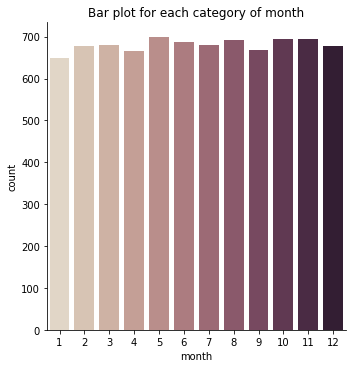

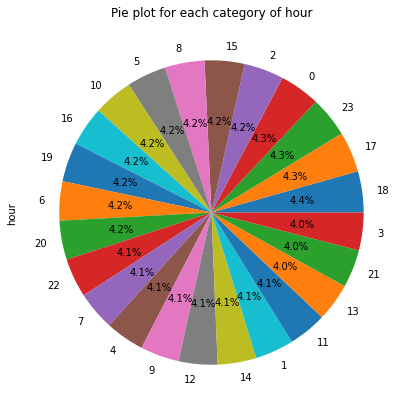

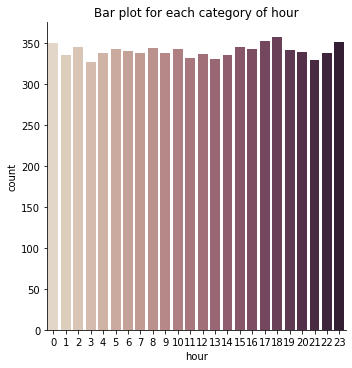

In [62]:
#ploting fucntion for see the distrabution
def plot_categotical_col(df, col_list):
    
    for col in col_list:    
        plt.figure(figsize = (12,7))
        # pie plot
        df[col].value_counts().plot(kind='pie', label= col, autopct='%1.1f%%').set(title='Pie plot for each category of ' + col)
        # bar plot
        sns.catplot(x = col ,kind = "count", palette = "ch:.25", data = df ).set(title='Bar plot for each category of ' + col)
        plt.show()
        
        
col_list = ['year', 'month', 'hour']
plot_categotical_col( new_df ,col_list )

we can see that each feature is uniformly distributed' therefore the data was collected uniformly


In [ ]:
#checking the correlation with the label
mean_year = new_df.groupby('year',as_index=False)['label'].mean()
mean_month = new_df.groupby('month',as_index=False)['label'].mean()
mean_hour = new_df.groupby('hour',as_index=False)['label'].mean()

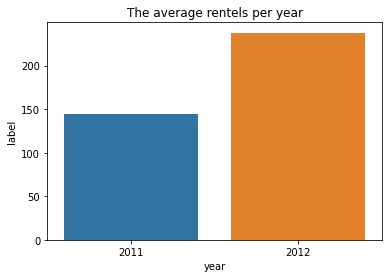

In [ ]:
sns.barplot(data=mean_year, x='year', y="label")
plt.title('The average rentels per year')
plt.show()

we can see  the average bikes rental in 2012 is higher than 2011

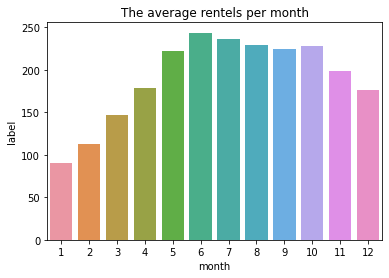

In [ ]:
sns.barplot(data=mean_month, x='month', y="label")
plt.title('The average rentels per month')
plt.show()

We can see that june is the month with the highest rentals' counts and january is the month with the lowest rentals' counts.

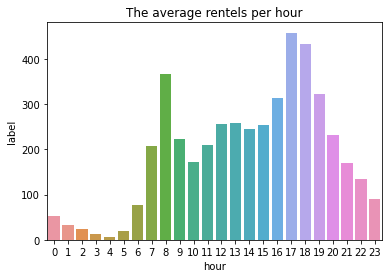

In [ ]:
sns.barplot(data=mean_hour, x='hour', y="label")
plt.title('The average rentels per hour')
plt.show()

We can see 5 pm is the hour with the most rentals by average.

We decided to change the 'datetime' feature to 3 features - 1.year, 2.month, 3.hour

In [63]:
train_df = pd.concat([new_df,train_df],axis=1)
train_df.drop('datetime',inplace=True,axis=1)
train_df.drop('label',inplace=True,axis=1)

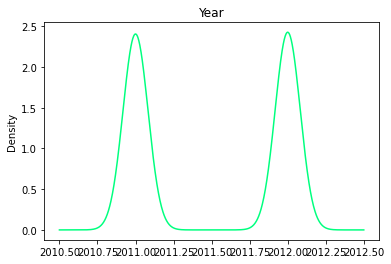

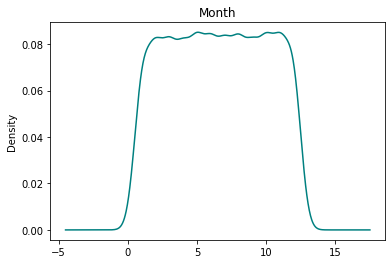

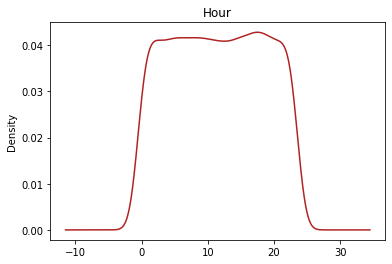

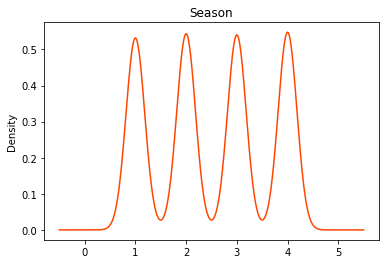

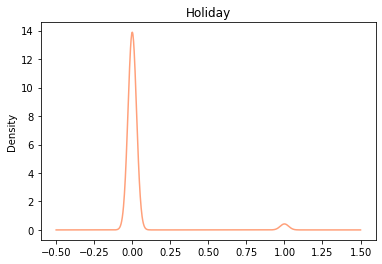

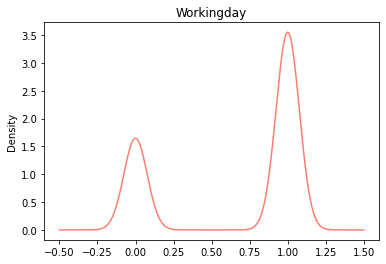

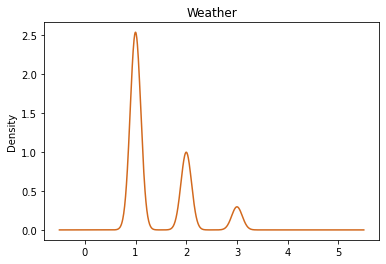

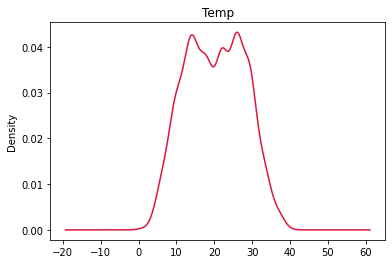

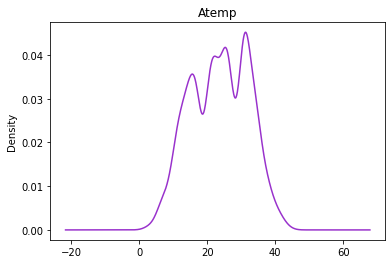

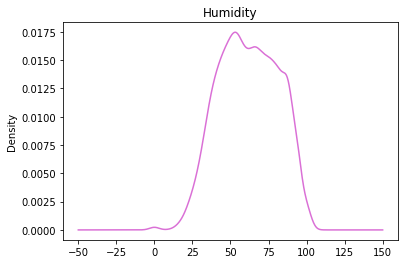

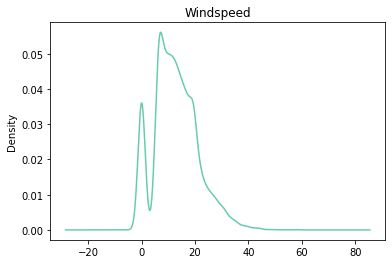

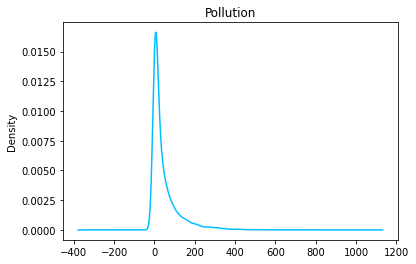

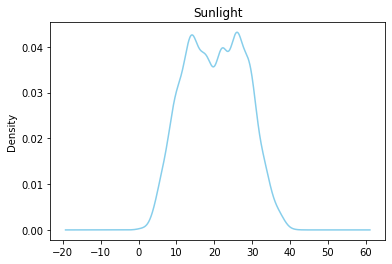

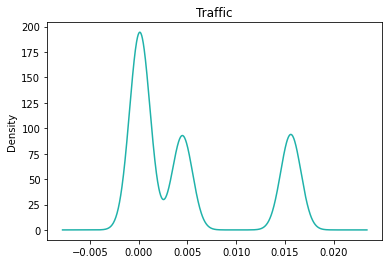

In [10]:
# exploring the other features
# function that create distrbutaion graph for all the numeric features
def create_disrbution_graph(df):
    colors = ['springgreen', 'teal','firebrick', 'orangered', 'lightsalmon','salmon', 'chocolate', 'crimson', 'darkorchid',\
          'orchid','mediumaquamarine','deepskyblue', 'skyblue', 'lightseagreen','yellowgreen', 'darkcyan',\
          'steelblue', 'dodgerblue', \
         'cornflowerblue', 'royalblue']
    for i, col in enumerate(df.select_dtypes(include=[float,int])):
        df[col].plot.density(color = colors[i])
        plt.title(col.capitalize())
        plt.show()
create_disrbution_graph(train_df.loc[:,:'traffic'])

We can see that the data is not normally distribution, all the techniques we know to deal with outlires base on data that normally distribute. Therefore, we decide not to deal with them.  

In [ ]:
fig = make_subplots(3,4,subplot_titles=("humidity","temp","atemp","sunlight","windspeed","pollution","windspeed","season","holiday","workingday","trafic","weather"))
fig.add_trace(go.Histogram(
    x = train_df['humidity'],
    y = train_df['count'],
    name= "humidity",
    ), 1,1)
fig.add_trace(go.Histogram(
    x = train_df['temp'],
    y = train_df['count'],
    name= "temp",
    nbinsx=40), 1,2)
fig.add_trace(go.Histogram(
    x = train_df['atemp'],
    y = train_df['count'],
    name= "atemp"), 1,3)
fig.add_trace(go.Histogram(
    x = train_df['sunlight'],
    y = train_df['count'],
    name= "sunlight"), 1,4) 
fig.add_trace(go.Histogram(
    x = train_df['windspeed'],
    y = train_df['count'],
    name= "windspeed"), 2,1)          
fig.add_trace(go.Histogram(
    x = train_df['pollution'],
    y = train_df['count'],
    name= "pollution",
    nbinsx=100,
    nbinsy=100), 2,2) 
fig.add_trace(go.Histogram(
    x = train_df['windspeed'],
    y = train_df['count'],
    name= "windspeed"), 2,3)
fig.add_trace(go.Histogram(
    x = train_df['season'],
    y = train_df['count'],
    name= "season"), 2,4) 
fig.add_trace(go.Histogram(
    x = train_df['holiday'],
    y = train_df['count'],
    name= "holiday"), 3,1) 
fig.add_trace(go.Histogram(
    x = train_df['workingday'],
    y = train_df['count'],
    name= "workingday",

    ), 3,2)
fig.add_trace(go.Histogram(
    x = train_df['traffic'],
    y = train_df['count'],
    name= "traffic",

    ), 3,3)
fig.add_trace(go.Histogram(
    x = train_df['weather'],
    y = train_df['count'],
    name= "weather",

    ), 3,4)
fig.update_layout(title="Total count for each feature",showlegend =False,width=1000,bargap=0.3)

fig.show()

We can see there are some simillar features: atemp , temp , weather and humidity have a connection to the subject weather. Let's visual them.  

In [ ]:
group_labels = ['distplot']
for i in ['atemp','temp','weather','humidity']:
  fig=ff.create_distplot([train_df[i]],group_labels)
  fig.update_layout(title =i+" distribution",width=1000)
  fig.show()

We can see there are some categorical features like traffic, seasons ,weather and binary's features like workingday and holiday - lets explore them and see how we handle with these categorical features. 

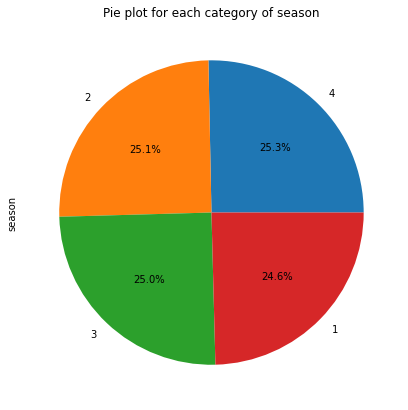

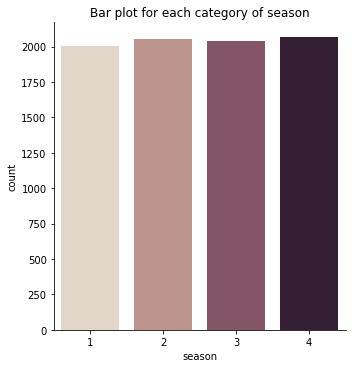

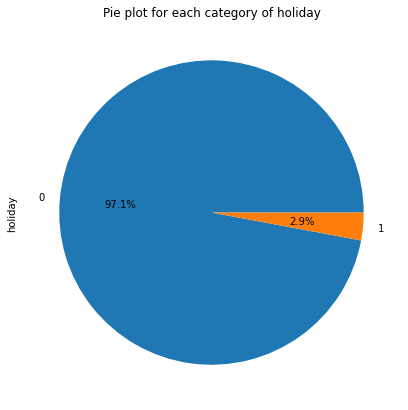

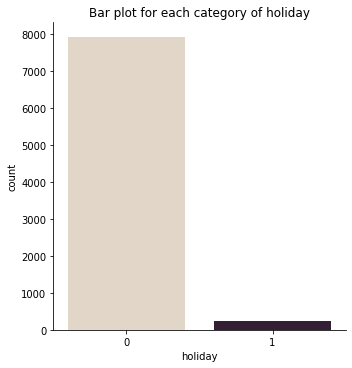

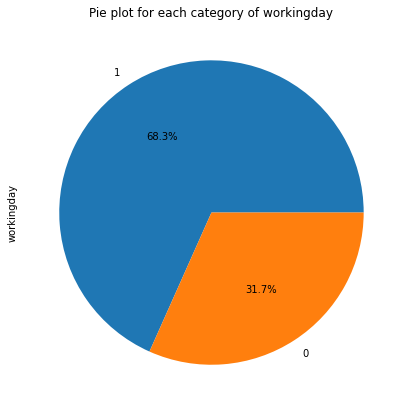

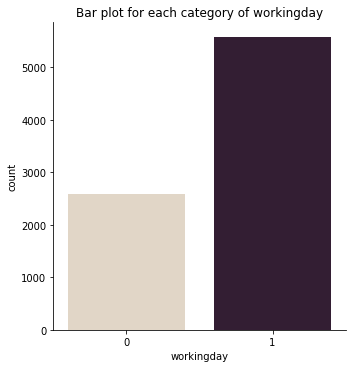

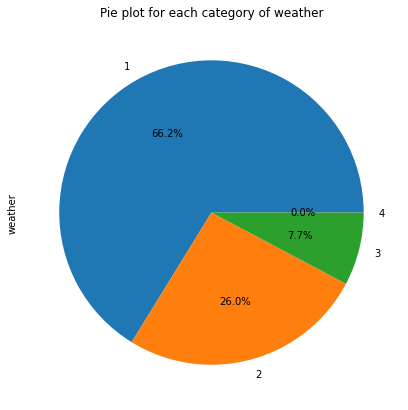

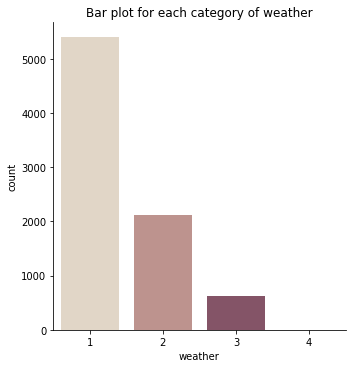

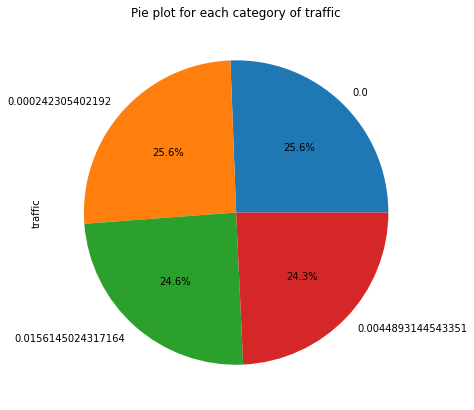

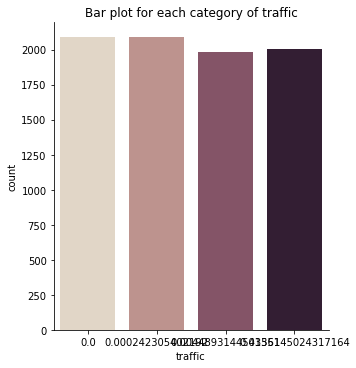

In [ ]:
# exploring the categorical features
col_list = ['season', 'holiday', 'workingday','weather','traffic']
plot_categotical_col( train_df ,col_list )

In [ ]:
# we can see that category 4 of the feature weather has very few sampels. let's check how many?

train_df['weather'].value_counts().to_frame()

,weather
1,5406
2,2125
3,632
4,1


We can see there is only one sample of this category. 

We can see there is large variance in the categories of the weather. We need to think how to handle with that. 

## Features engineering
for doing this we will use 3 methods:
1. for the categroical features -hour and month. To minimize the categories numbers of the hour and month in the daytime feature we will enter the mean of the rentals counts of each category,and than we will use the propotion of the average. 
2. create dummy features from features with small number of categories
3. checking correlative features - if there is storng correlation we can remove one of them


In [64]:
# The function
# create a dictionary of the proporation by the method below
# the category with the biggest average of the rental bike from all the categories get the value 1
# each category will get the value of by the scale of the category with the highest average
def avg_cal_func(df,lst):
    copy_df = df.copy()
    copy_df = copy_df[lst]
    lst_of_priors_val = [ ]
    for i in range(len(lst)-1):
        #summing the values
        cat_sum_val={}
        cat_sum = {}
        for row in copy_df.iterrows():
            cat_sum_val[row[1][i]] = cat_sum_val.get(row[1][i],0) + +row[1][-1]
            cat_sum[row[1][i]] = cat_sum.get(row[1][i],0) + 1
        avg_dict = {}
        for key in cat_sum.keys():
            avg_dict[key] = cat_sum_val[key]/cat_sum[key]
        # create a dictionary of the proporation by the method below
        # the category with the biggest average get the value 1
        # each category will get the value of by the scale of the category with the higest average
    
        max = 0
        temp = 0
        idx = list(avg_dict.keys())[0]
        for key in avg_dict:
            temp = avg_dict[key]
            if temp > max:
                
                max = temp
                idx = key

        scale = avg_dict.get(idx)
        for key in avg_dict:
            avg_dict[key] = avg_dict.get(key) / scale
        

        lst_of_priors_val.append(avg_dict)

    return lst_of_priors_val

In [65]:
# function that return the new dateframe with the average of the features:
def changing_to_avg(df,lst):

    new_df = df.copy()
    new_val = avg_cal_func(new_df[lst],lst)
    temp = -1
# changing the value in the new df based of the average 
    for i in range(len(new_val)):
        for key in new_val[i]:
            if new_val[i].get(key) != 1:
                new_df[lst[i]] = new_df[lst[i]].replace([key],new_val[i].get(key))
            else:
                temp = key

        new_df[lst[i]] = new_df[lst[i]].replace([temp],new_val[i].get(temp))

    
    
    return new_df

In [16]:
# we will work on a copy dataframe because we want to stay later wth the original to the validation because we based on the labels we don't want it to influance later on the validation.

temp_df = changing_to_avg(train_df,['month','hour','count'])


# Create dummies:
We decided to create dummies on the categorical features which we don't know - weather and seasons
In addition we will create dummy variabel for the feature 'year' because we have 2 group of him.

In [66]:
# adding dummeys for the year
def create_dummies(df1):
    df = df1.copy()
    dummies = pd.get_dummies(df['year'])
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(['year'],axis=1)
    dummies = pd.get_dummies(df['season'],prefix='season')
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(['season'],axis=1)
    dummies = pd.get_dummies(df['weather'],prefix='weather')
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(['weather'],axis=1)
    count = df.pop('count')
    df.insert(len(df.columns),'count',count)
    return df

In [18]:
temp_df= create_dummies(temp_df)

# Visulaize correlations

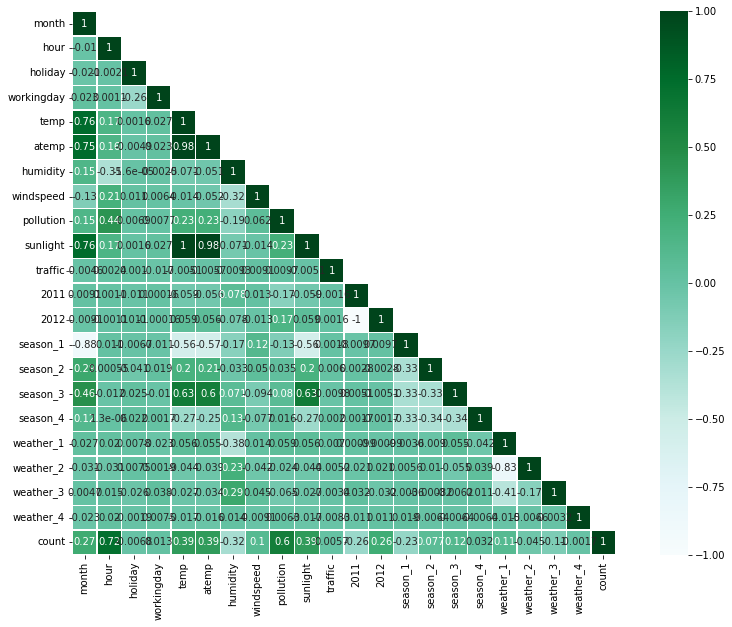

In [19]:
def correlation_mat(df_name, labels):    
    df = pd.concat([df_name,labels],axis=1)
    corrMatrix = df.corr()
    mask = np.zeros_like(corrMatrix, dtype=bool)
    mask[np.triu_indices_from(mask, k=1)] = True
    plt.figure(figsize = (16,10))
    sns.heatmap(corrMatrix, linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",  linecolor='w', annot=True, mask=mask)       
    plt.show()
correlation_mat(temp_df.loc[:,:'weather_4'], train_df['count'])


We can see there are some feature with correlation 1 or realy close to 1. 

In [ ]:
# correlation with the label only
labels_v1 = label.squeeze()
label_corrs = temp_df.loc[:,:'weather_4'].corrwith(labels_v1)
label_corrs = pd.DataFrame(label_corrs, columns = ['count']) 
label_corrs = label_corrs.sort_values('count', ascending = False) 
label_corrs.style.background_gradient(cmap = 'GnBu_r')

,count
hour,0.722859
pollution,0.603815
temp,0.389597
sunlight,0.389597
atemp,0.385754
month,0.266477
2012,0.257132
season_3,0.123478
weather_1,0.106206
windspeed,0.102783


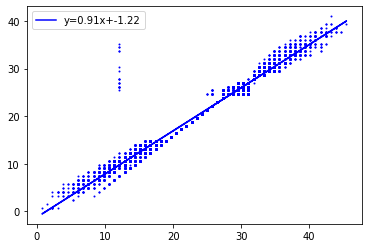

In [ ]:
# Let's see some the linear link between the features

ax=plt.axes()
x = train_df['atemp']
y= train_df['temp']

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
plt.plot(x, line, 'blue', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#end


plt.scatter(x,y, color="blue", s= 1)
plt.legend(fontsize=10)

plt.show()

We can see that there is a clear corelation between the columns atemp and temp. It's make sense because the features are very similar. We will maybe consider to take down one of them. 


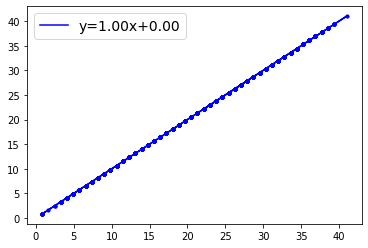

In [ ]:
# Let's see some the linear link between the features

ax=plt.axes()
x = train_df['temp']
y= train_df['sunlight']

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
plt.plot(x, line, 'blue', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#end

plt.scatter(x,y, color="blue", s=10)
plt.legend(fontsize=14)

plt.show()

We can see that there is a clear corelation between the columns sunlight and temp. But the meaning of each feature is different. 

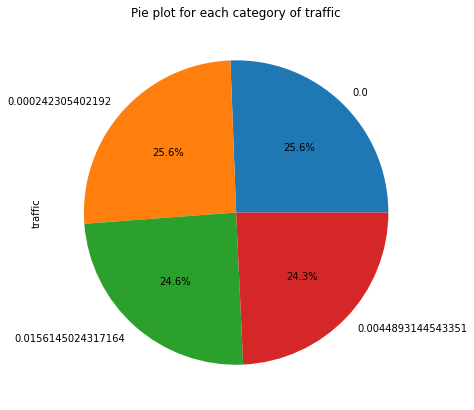

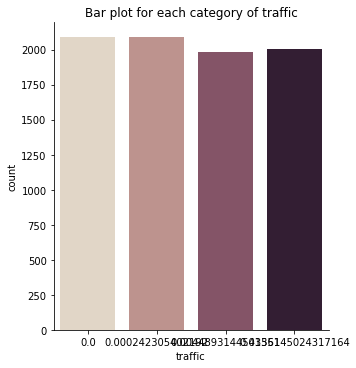

In [ ]:
traffic = train_df['traffic'].value_counts()
plot_categotical_col(train_df,['traffic'])

In [ ]:
traffic_value = train_df['traffic'].unique()
data = []
for k in traffic_value:
  temp_df = train_df.loc[(train_df['traffic']== k) ]
  avg = temp_df['count'].mean()
  data.append([k, avg])

new_df = pd.DataFrame(data, columns=['traffic', 'avg_count'])
new_df

,traffic,avg_count
0,0.000000,190.836842
1,0.004489,189.038364
2,0.000242,191.784004
3,0.015615,193.675312


We can see there are 4 different value in this column. Moreover, we can see that the average of the cout is realy close to each other. We asume that this column will not prefer out model therefor we will delete it. 

In [67]:
# create the dummies on the orignal train before the split
train_df = create_dummies(train_df)

In [68]:
# split into train and validation
train_without_labels = train_df.copy()
train_without_labels = train_without_labels.drop(['count'],axis=1)


In [81]:
# function that return the test/val dateframe based on the train feature engenniring:
def change_values_based_on_train(train_with_labels,test,lst_of_prior,lst_of_features):
    train = train_with_labels.copy()
    test_df = test.copy()
    for i in range(len(lst_of_prior)):
        for key in lst_of_prior[i]:
            if lst_of_prior[i].get(key) != 1:
                test_df[lst_of_features[i]] = test_df[lst_of_features[i]].replace([key],lst_of_prior[i].get(key))
            else:
                temp = key
        test_df[lst_of_features[i]] = test_df[lst_of_features[i]].replace([temp],lst_of_prior[i].get(temp))

    return test_df

In [70]:
# create a pre processing function to the validation 
def val_pre_process(train_df,train_labels_df,val_df,lst=['month','hour']):
    # creating a copy
    train_with_labels = pd.concat([train_df,train_labels_df],axis=1)
    # find the value of the average based only on the train label
    list_of_priors_val = avg_cal_func(train_with_labels,lst=['month','hour','count'])
    #changing the train df 
    train_with_labels = changing_to_avg(train_with_labels,lst=['month','hour','count'])
    #changing the validation based on the train average values
    val_df = change_values_based_on_train(train_with_labels,val_df,list_of_priors_val,lst)
    train = train_with_labels.drop(['count'],axis=1)
    return train, val_df

    

In [71]:
def test_pre_process(train_df,test_df):
    train = train_df.copy()
    test = test_df.copy()
    # creating the year,month and hour features for the test
    test['datetime'] = pd.to_datetime(test['datetime'],  format = '%Y-%m-%dT%H:%M:%S' ,  errors = 'coerce')
    
    new_df = pd.DataFrame({'year':test['datetime'].dt.year,'month':test['datetime'].dt.month,'hour':test['datetime'].dt.hour})
    test = pd.concat([new_df,test],axis=1)
    test.drop('datetime',inplace=True,axis=1)
    # create dummies for the test
    test = create_dummies(test)
    test =test.drop(['count'],axis=1)
    train_labels = train['count']
    train_without_labels = train.drop(['count'],axis=1)
    
    train,test = val_pre_process(train_without_labels,train_labels,test,lst=['month','hour'])

    # removing the features from the train and test
    test = removing_features(test,lst_of_ft=['traffic','atemp'])
    return train,test

# Dimension reduction

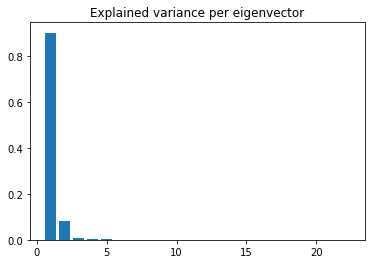

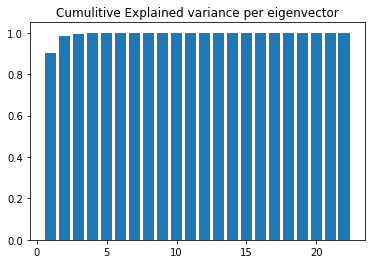

For explained variance: 0.95 number of dimensions: 2
For explained variance: 0.99 number of dimensions: 3


In [31]:
pca = PCA(n_components =train_df.shape[1])
pca.fit_transform(train_df)
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.title("Explained variance per eigenvector")
plt.show()
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulitive Explained variance per eigenvector")
plt.show()
for variance in [0.95, 0.99]:
    pca = PCA(variance)
    data = pca.fit_transform(train_df)
    print("For explained variance:", variance, "number of dimensions:", data.shape[1])

As We can see, the number of features that preserves at least 99% of the variance is 3. <br>
If earlier we discussed high-dimensionality, in this case, it's the exact opposite. <br>
Having low-dimensionality can cause under-fitting and result in bad performance on the classification. We aspire to lower the bias and variance as much as we can,<br> as opposed to the bais-variance trade-off, low-dimensionality may increase bias and decrease the variance. <br>
We believe using this method, not only causes underfitting, it is incorrect and unappropriate to base on only 3 features in our model. <br>
For the following reasons, we won't base on this method in our dimension reduction.<br>


## Manual Feature Selecting


As we saw before there are several features that are correlative or features without many values ​​that can be given up.
That's why we decided to remove the following features:
1. weather_4 - we will remove it because this feature contains only one sample.
2. atemp because of its correlative to temp
3. traffic - for the reasons we explained above.


In [72]:
def removing_features(df,lst_of_ft=['weather_4','traffic','atemp']):
    df1 = df.copy()
    df1 = df1.drop(lst_of_ft,axis=1)
    return df1

In [73]:
train_df = removing_features(train_df)

In [74]:
train_df.columns

Index([     'month',       'hour',    'holiday', 'workingday',       'temp',
         'humidity',  'windspeed',  'pollution',   'sunlight',         2011,
               2012,   'season_1',   'season_2',   'season_3',   'season_4',
        'weather_1',  'weather_2',  'weather_3',      'count'],
      dtype='object')

### Pre-Processing for the test

We will do that based on the function we worte earlier. 

In [77]:
# save the labels for modeling
test_labels = test_df['count']

In [82]:
train, test = test_pre_process(train_df,test_df)

Let's standardize the data beforehand to prevent the scale of each feature from affecting the model disproportionately

In [85]:
scaler = StandardScaler()
train_normalize = scaler.fit_transform(train)
test_normalize = scaler.fit_transform(test)

<br><br>
# Part 3: Modelling <a class="anchor" id="Part3"></a> 

<br>

**Now for the modeling part.** <br>
We performed the pre-processing as mentioned above with the models kept in mind.
For choosing the ideal parameters we used grid_search_cv.<br><br>

**Here are the models we used and why we used them:** <br><br>
* **KNN -**  For this model, we chose to standardize the data beforehand to prevent the scale of each feature from affecting the model disproportionately.<br><br> 

* **Logistic Regression -** For this model, we chose to standardize the data since we were using the l2 penalty, which is affected by the scale of the features.<br><br>

* **XGBoost -** Here, we chose not to normalize the data, since Random Forest is invariant to scale. This model performed the best out of all models both on the test and train datasets. We believe since Random Forest is capable of non-linear classification, it can effectively handle outliers by separating them away from the data, and can deal with our large dataset by generating more trees and deeper trees.<br><br>


In [45]:
d_scores ={}

### Now for our models-
<br>

#  K-Nearest-Neighbors


Using grid search for finding the ideal parameters-
<br>
Define paramaters to search over and their values.  
**The default parameters -** <br>(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2,
metric='minkowski', metric_params=None, n_jobs=None)

In [86]:
knn_time_start = timeit.default_timer()

In [87]:
knn_parameters = {'n_neighbors': [num for num in range(20,70,10)], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']\
                 ,'weights': [ 'uniform', 'distance' ]}

Gs_knn = GridSearchCV( KNeighborsRegressor(), knn_parameters ).fit(train, label)

# finding the best set of parameter values to train the model on.

best_estimator = Gs_knn.best_estimator_
best_params = Gs_knn.best_params_

#  rmse score on train
best_score = sqrt(mean_squared_error(label, best_estimator.predict(train_normalize)))

print(f'Best Params: {best_params} \n')


Best Params: {'algorithm': 'auto', 'n_neighbors': 60, 'weights': 'distance'} 



After we found the best set of parameter values to train the model we can check the auc
with those parameters

In [88]:
# performing the KNN nodel
best_params = {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 60, 'weights': 'distance'} 

KNN = KNeighborsRegressor().set_params(**best_params)

# testing the model's performance 
knn_best_score = sqrt(mean_squared_error(test_labels, best_estimator.predict(test_normalize)))
print(knn_best_score)

209.4265952628054


In [89]:
d_scores['KNN']=knn_best_score

In [90]:
knn_time_stop = timeit.default_timer()
knn_run_time = knn_time_stop-knn_time_start
knn_run_time

57.38134376300013

# XGboost 

In [91]:
xgb_time_start = timeit.default_timer()

In [ ]:
xgb_parameters = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'] ,"learning_rate": (0.05, 0.10, 0.15),\
                        "max_depth": [ 3, 4, 5, 6, 8],'n_estimators': [i for i in range(50,300,50)],'max_features' : ['auto', 'sqrt', 'log2']}
            
Gs_xgb = GridSearchCV(GradientBoostingRegressor(), xgb_parameters).fit(train_normalize, label)
best_params1 = Gs_xgb.best_params_
best_estimator1 = Gs_xgb.best_estimator_
print(best_params1)

KeyboardInterrupt: ignored

In [92]:
best_params1 ={'learning_rate': 0.1,  'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}

XGB = GradientBoostingRegressor().set_params(**best_params1).fit(train,label)
print(sqrt((mean_squared_error(test_labels, XGB.predict(test)))))


43.06276886206322


In [94]:
d_scores['xgb'] = sqrt((mean_squared_error(test_labels, XGB.predict(test))))

In [96]:
features = train.columns


18

In [97]:
fig=px.bar(x=features,y=XGB.feature_importances_,title=" XGB feature importance")
fig.update_xaxes(categoryorder='total ascending')
fig.update_layout(width=800,height=500)

We can see that the most imortant features are hour pollution and workingday

In [98]:
top_3_xgb =['hour','pollution','workingday']

In [99]:
xgb_time_stop = timeit.default_timer()
xgb_time_run =xgb_time_stop-xgb_time_start
xgb_time_run

175.063315073

<br><br>
# Logistic Regression
<br>Using grid search for finding the ideal parameters-</br>
define paramaters to search over and their values.  
**The default parameters -** <br>(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False,
n_jobs=None, l1_ratio=None).</br></br>
We are going to use grid search cv to find the best parameters fot logistic regression.



In [100]:
logistic_rgression_time_start=timeit.default_timer()


In [102]:
param = {}
param['penalty']=['l1','l2']
param['solver']=['lbfgs','sag']
param['C']=[0.1,2]
param['max_iter']=[100]
best_p_lr = GridSearchCV(LogisticRegression(),param_grid=param,cv=5,n_jobs=-1)
best_p_lr.fit(train,label)

KeyboardInterrupt: ignored

In [109]:
logreg_best_param={'C': 2, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}
print(logreg_best_param)

{'C': 2, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}


Function that is running regression model and returns RMSE score:

In [104]:
def logistic_Regression_(xtr,xtst,ytrn,ytst,string_name):
    logistic_reg = LogisticRegression(**logreg_best_param,warm_start=True)
    model_reg = logistic_reg.fit(xtr,ytrn)
    logreg_pred = model_reg.predict(xtst)
    best_score = sqrt(mean_squared_error(ytst, logreg_pred))
    return best_score
    

In [110]:
log_reg_best_score = logistic_Regression_(train_normalize,test_normalize,label,test_labels,"initial regression with no modifications")
d_scores['logistic']=log_reg_best_score
print(log_reg_best_score)


105.00632219166819


In [111]:
logistic_reg = LogisticRegression(**logreg_best_param,warm_start=True)
model_reg = logistic_reg.fit(train_normalize,label)
logreg_pred = model_reg.predict(test_normalize)

In [112]:
feature_names=train.columns

In [113]:
fig=px.bar(x=feature_names,y=model_reg.coef_[0],title="Logistic Regression feature importance")
fig.update_xaxes(categoryorder='total ascending')
fig.update_layout(width=800,height=500)

In [114]:
top_3_logreg = ['hour','pollution','season_4']


In [115]:
logistic_rgression_time_stop=timeit.default_timer()
logistic_reg_time = logistic_rgression_time_stop-logistic_rgression_time_start
logistic_reg_time

1269.0877096479994

In [116]:
features_Added = [ 2011,2012,'season_1','season_2','season_3',   'season_4',  'weather_1',  'weather_2',  'weather_3','weather_4']


In [117]:
features_removed=['atemp','weather_4','count','traffic']

In [119]:
results = {'model': ['KNN', 'XgbBoost', 'Logistic regression'],
           'Score (RMSE)': [d_scores['KNN'],d_scores['xgb'],d_scores['logistic']],
           'Hyperparams used': [[best_params], [best_params1], [logreg_best_param]],
           'Features dropped': [features_removed, features_removed, features_removed],
           'New features created': [features_Added, features_Added,features_Added],
           'Runtime trainining + inference (seconds)': [knn_run_time, xgb_time_run ,logistic_reg_time],
           'Hardware used (GPU/CPU/TPU)': ['GPU', 'GPU', 'GPU'],
           'Explainability (top 3 features)': [['NONE'],top_3_xgb,top_3_logreg]
           }

df = pd.DataFrame(results)
df

,model,Score (RMSE),Hyperparams used,Features dropped,New features created,Runtime trainining + inference (seconds),Hardware used (GPU/CPU/TPU),Explainability (top 3 features)
0,KNN,209.426595,"[{'algorithm': 'auto', 'n_jobs': 1, 'n_neighbo...","[atemp, weather_4, count, traffic]","[2011, 2012, season_1, season_2, season_3, sea...",57.381344,GPU,[NONE]
1,XgbBoost,43.062769,"[{'learning_rate': 0.1, 'max_depth': 8, 'max_f...","[atemp, weather_4, count, traffic]","[2011, 2012, season_1, season_2, season_3, sea...",175.063315,GPU,"[hour, pollution, workingday]"
2,Logistic regression,105.006322,"[{'C': 2, 'max_iter': 100, 'penalty': 'l2', 's...","[atemp, weather_4, count, traffic]","[2011, 2012, season_1, season_2, season_3, sea...",1269.087710,GPU,"[hour, pollution, season_4]"


In [121]:
import os
df.to_csv(os.path.join(os.getcwd(), 'exercise1.csv'))

In [122]:
stop = timeit.default_timer()
full_runtime=(stop - start)
print('Time: ', full_runtime,"minutes") 

Time:  2266.9422594500006 minutes
